In [3]:
import tensorflow as tf
import keras
from keras.models import load_model
tf.keras.backend.clear_session()

In [93]:
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as img_plt

In [97]:
def prediction(model_class_path, model_seg_path, img_path):
    img = read_image(img_path, 224)
    model_classification = load_model(model_class_path)
    # Generate predictions for samples
    predictions_classification = model_classification.predict(img)
    if predictions_classification[0] > 0.5:
        model_segmentation = load_model(model_seg_path, custom_objects={"iou": iou})
        img = read_image(img_path, 256, canales = 1)
        prediction_segmentation = model_segmentation.predict(img)
        show_prediction(img_path, prediction_segmentation)
    else:
        print(f'La radiografía es: Lateral\n Con una probabilidad de:\n {predictions_classification[0]}')

In [116]:
def show_prediction(img_path, mask):
  plt.figure(figsize=(20,8))
  plt.subplot(121)
  plt.imshow(img_plt.imread(img_path))
  plt.axis('off')
  plt.title('Imagen')
  plt.subplot(122)
  plt.imshow(mask[0])
  plt.axis('off')
  plt.title('Máscara')
  plt.show()

In [112]:
smooth = 1.
def iou(targets, inputs):
    
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    
    intersection = K.sum(targets * inputs)
    total = K.sum(targets) + K.sum(inputs)
    union = total - intersection
    
    IoU = (intersection + smooth) / (union + smooth)
    return IoU

In [89]:
def read_image(image_path, img_size, canales = 3):
    IMG_SIZE = (img_size, img_size)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=canales)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = np.expand_dims(image, axis=0)
    image = tf.image.resize(image, IMG_SIZE, method='nearest')

    return image

In [107]:
classification_path = './frontal_lateral/lung_clasification/models/Train01/lung_data_aug.h5'
segmentation_path = './lung_segmentation/binary_segmentation/models/Train1/model.h5'

class_frontal_img_path = 'inferencia/frontal.png'
class_lateral_img_path = 'inferencia/lateral.png'


-   No me pinta bien la imagen original no entiendo muy bien porque, ya que el path de la imagen se lo paso correctamente.

1/1 [==============================] - 1s 910ms/step


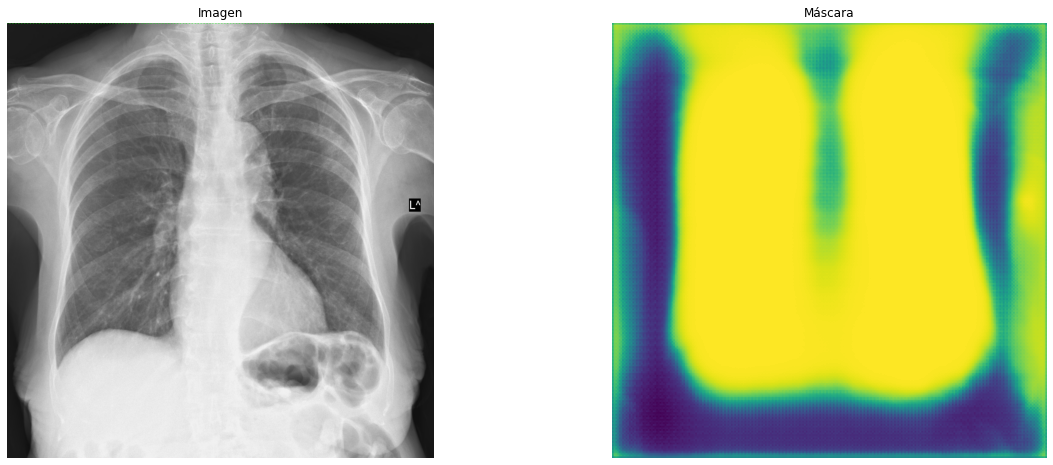

In [117]:

prediction(classification_path,segmentation_path, class_frontal_img_path)